In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

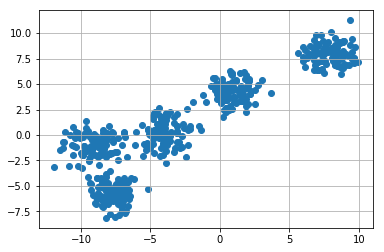

In [17]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [18]:
k = 5
color = ['green', 'red', 'blue', 'yellow', 'orange']
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster

In [19]:
#clusters

In [20]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

## Implementing E-step

In [21]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

## Plotting

In [22]:
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        #Plot the points
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker='*')

## Implementing the M-step

In [23]:
# Update every cluster center according to the mean of the points in it
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = []

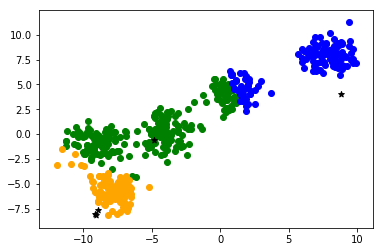

In [24]:
assignPointToClusters(clusters)
plotClusters(clusters)

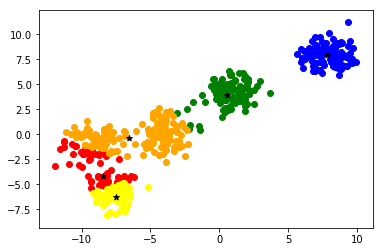

In [40]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)